In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

## Exercise 2
In the course you learned how to do classification using Fashion MNIST, a data set containing items of clothing. There's another, similar dataset called MNIST which has items of handwriting -- the digits 0 through 9.

Write an MNIST classifier that trains to 99% accuracy or above, and does it without a fixed number of epochs -- i.e. you should stop training once you reach that level of accuracy.

Some notes:
1. It should succeed in less than 10 epochs, so it is okay to change epochs to 10, but nothing larger
2. When it reaches 99% or greater it should print out the string "Reached 99% accuracy so cancelling training!"
3. If you add any additional variables, make sure you use the same names as the ones used in the class

I've started the code for you below -- how would you finish it? 

2.8.0
Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2585 - accuracy: 0.9265
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1145 - accuracy: 0.9659
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0795 - accuracy: 0.9758
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0587 - accuracy: 0.9819
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0443 - accuracy: 0.9862
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0361 - accuracy: 0.9887
Epoch 7/10
1861/1875 [============================>.] - ETA: 0s - loss: 0.0280 - accuracy: 0.9917
Reached 99% accuracy so cancelling training!
313/313 [==============================] - 1s 2ms/step - loss: 0.0739 - accuracy: 0.9782


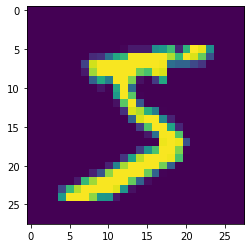

In [10]:


import tensorflow as tf
print(tf.__version__)
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.99):
      print("\nReached 99% accuracy so cancelling training!")
      self.model.stop_training = True

mnist = tf.keras.datasets.mnist

(train_images, train_labels),(test_images, test_labels) = mnist.load_data()
# YOUR CODE SHOULD START HERE

# YOUR CODE SHOULD END HERE
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])
callbacks = myCallback()
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
train_images = train_images/255.0
test_images = test_images/255.0
model.fit(train_images,train_labels, epochs=10,callbacks=[callbacks])
model.evaluate(test_images, test_labels)
import matplotlib.pyplot as plt
plt.imshow(train_images[0])
# YOUR CODE SHOULD START HERE
# YOUR CODE SHOULD END HERE